In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import make_classification

In [3]:
from qmmc.structure2 import *

In [5]:
w_real = np.random.randn(5)
X = 5 * np.random.randn(1000, 5)
y = X.dot(w_real)

In [20]:
mu_0, sigma_0 = Value(0), Value(3)

X = Value(X)
w = Normal(mu_0, sigma_0, size=5, name='theta')

@Function
def Xdotw(w=w, X=X):
    return X.dot(w.value)

y = Normal(Xdotw, Value(2), value=y, observed=True)

In [21]:
model = Model([y, linear, w])

In [22]:
print w_real
print w.value

[ 1.21979372 -0.92051562 -0.67399991 -1.44688273 -1.39796361]
[ -1.04876388e+00   3.46356947e-03   9.29334944e-01  -2.99118609e-01
  -5.26628869e+00]


In [23]:
Xdotw.value

AttributeError: 'Value' object has no attribute 'dot'

In [9]:
model.estimate(1000)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(model.logp_history)
plt.title("Complete likelihood trace")

plt.subplot(2, 2, 2)
plt.plot(model.samplers['theta'].get_history())
plt.title(r"Trace of $\theta$")

plt.suptitle(r"Traces", size=18)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [8]:
model.samplers['theta'].accepted

989

In [11]:
print theta._value
print theta._last_value

[ 2.85846182 -3.55148792  1.77441602 -2.09529932  1.15292432]
[ 2.85382933 -3.62556844  1.72587548 -2.11201381  1.16981478]


In [10]:
model.samplers['theta']._propose()

In [10]:
import pymc

Couldn't import dot_parser, loading of dot files will not be possible.


In [11]:
X, y = make_classification(1000, n_features=5, n_informative=5, n_redundant=0)
theta = pymc.Normal('theta', 0, 2, size=5)

@pymc.deterministic
def linear(X=X, theta=theta):
    return X.dot(theta)

y = pymc.Normal('y', linear, 2, value=y, observed=True)

In [12]:
model = pymc.Model([theta, linear, y])

In [13]:
mcmc = pymc.MCMC(model)

In [14]:
mcmc.sample(10000, 0, 1)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.9 sec

In [15]:
theta_samples = mcmc.trace('theta')[:]

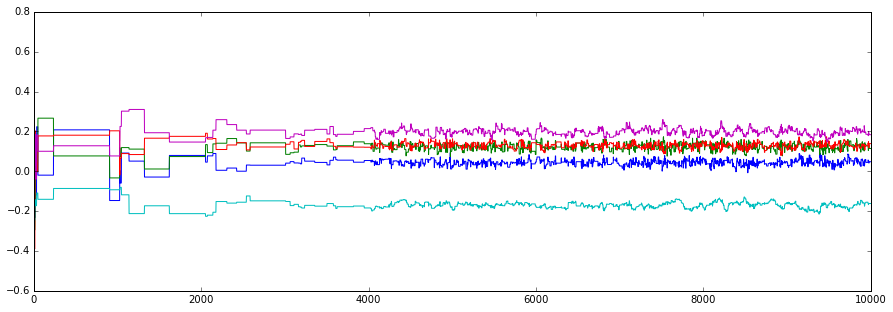

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(theta_samples)
plt.show()

In [19]:
s = mcmc.step_method_dict[theta][0]

In [24]:
s.markov_blanket

[<pymc.distributions.Normal 'theta' at 0x10f36d410>,
 <pymc.distributions.Normal 'y' at 0x109b52d90>]